### Exploring the data, and the demographic

Firstly we will need to import the data, in this analysis we will use: pandas, numpy, seaborn, matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src import data_loader

Then we will load all the data we will probably need to analyze:

In [181]:
ratings, movies, users, genres, occupations = data_loader.load_data()
movies_ratings = data_loader.create_movie_ratings_array(ratings, movies)
user_ratings = data_loader.create_user_ratings_array(ratings, users)

Let's then print the shape of our data along with the first few lines so that we know what exactly we are working with:

In [182]:
print(f"The shape of the ratings data frame is {ratings.shape}")
print("The first 5 lines of data are:")
print(ratings[:5])

The shape of the ratings data frame is (100000, 4)
The first 5 lines of data are:
   userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596


Something we also need to consider, about the rating data in our dataset, is the values that the rating has, What are the possible values and how often are they used?

<Axes: xlabel='rating', ylabel='Count'>

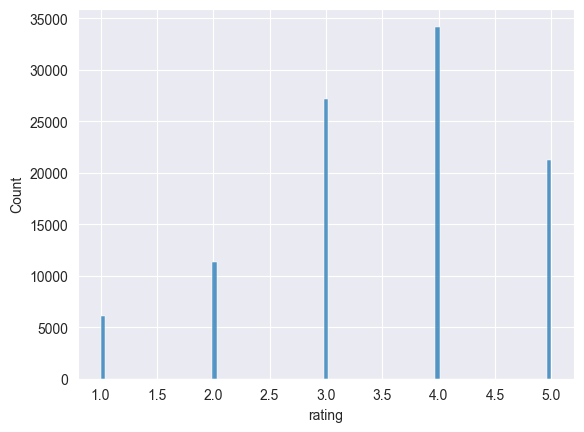

In [183]:
sns.histplot(ratings["rating"])

What we can see is that the lowest rating is 1 star and the highest is 5 stars. The user can enter only integer values. The rating is generally positive with the most frequently used rating being 4 stars followed by 3 and then 5 stars. Even among the lower ratings, the 2-star rating is more common than the 1-star rating. The frequency of the higher star rating has also a big gap with the frequency of the lower reviews. We could also need to know more about the activity of the users and their rating frequency:

<Axes: xlabel='userId', ylabel='Count'>

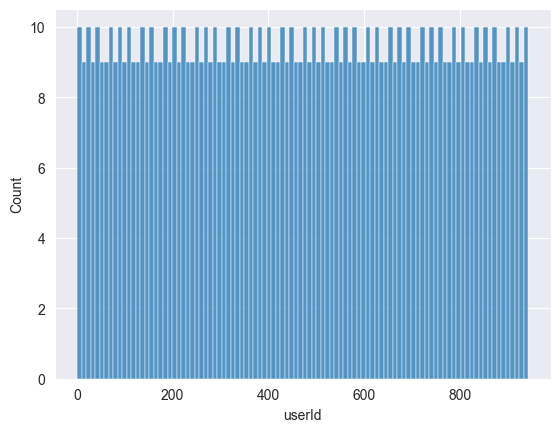

In [184]:
ratings_by_user = ratings.groupby("userId").size().reset_index()
ratings_by_user.columns = ["userId", "number_of_ratings"]
sns.histplot(ratings_by_user, x="userId" , bins=100 )

From this we can see the count of the ratings per user, we can get a general image, like most users rate more than 8 movies and generally there is no big disparity in the number of rated movies. But to get a better isea of the data we could probably use the describe function:

In [185]:
ratings_by_user.describe()

,userId,number_of_ratings
count,943.000000,943.000000
mean,472.000000,106.044539
std,272.364951,100.931743
min,1.000000,20.000000
25%,236.500000,33.000000
50%,472.000000,65.000000
75%,707.500000,148.000000
max,943.000000,737.000000


Now let's review the data about how many ratings each movie received, as for the number of movies reviewed by each user, we will firstly create a data frame, then plot a histogram and lastly use the describe function to get more accurate / quantative data

<Axes: xlabel='movieId', ylabel='Count'>

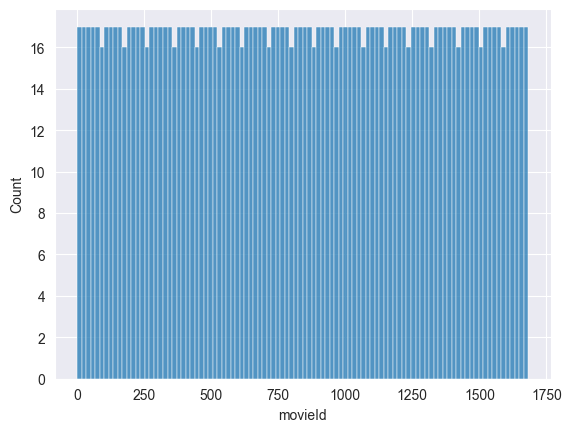

In [186]:
ratings_by_movie = ratings.groupby("movieId").size().reset_index()
ratings_by_movie.columns = ["movieId", "number_of_ratings"]
sns.histplot(ratings_by_movie, x="movieId" , bins=100 )

In [187]:
ratings_by_movie.describe()

,movieId,number_of_ratings
count,1682.000000,1682.000000
mean,841.500000,59.453032
std,485.695893,80.383846
min,1.000000,1.000000
25%,421.250000,6.000000
50%,841.500000,27.000000
75%,1261.750000,80.000000
max,1682.000000,583.000000


Here we can see that the max ratings for 1 movie are 583 out of 100k (total ratings), the mean is about 60 ratings per movie, which is pretty low, considering the max value. The minimum review in a movie is just 1 review.

In [188]:
print(f"The shape of the movies data frame is {movies.shape}")
print("The first 5 lines of data are:")
print(movies[:5])

The shape of the movies data frame is (1682, 24)
The first 5 lines of data are:
   movieId              title  releaseDate  videoReleaseDate  \
0        1   Toy Story (1995)  01-Jan-1995               NaN   
1        2   GoldenEye (1995)  01-Jan-1995               NaN   
2        3  Four Rooms (1995)  01-Jan-1995               NaN   
3        4  Get Shorty (1995)  01-Jan-1995               NaN   
4        5     Copycat (1995)  01-Jan-1995               NaN   

                                             imdbUrl  unknown  action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...        0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...        0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)        0       0   

   adventure  animation  children's  ...  fantasy  film-noir  horror  musical  \
0          0   

In [189]:
print(f"The shape of the users data frame is {users.shape}")
print("The first 5 lines of data are:")
print(users[:5])

The shape of the users data frame is (943, 5)
The first 5 lines of data are:
   userId  age gender  occupation zipcode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213


In [190]:
print(f"The shape of the genres data frame is {genres.shape}")
print("The first 5 lines of data are:")
print(genres[:5])

The shape of the genres data frame is (19, 1)
The first 5 lines of data are:
            genre
unknown         0
Action          1
Adventure       2
Animation       3
Children's      4


In [191]:
print(f"The shape of the occupations data frame is {occupations.shape}")
print("The first 5 lines of data are:")
print(occupations[:5])

The shape of the occupations data frame is (21, 1)
The first 5 lines of data are:
      occupation
0  administrator
1         artist
2         doctor
3       educator
4       engineer


In [192]:
print(f"The shape of movie & ratings data frame is {movies_ratings.shape}")
print("The first 5 lines of data are:")
print(movies_ratings[:5])

The shape of movie & ratings data frame is (100000, 27)
The first 5 lines of data are:
   userId  movieId  rating  timestamp                       title  \
0     196      242       3  881250949                Kolya (1996)   
1     186      302       3  891717742    L.A. Confidential (1997)   
2      22      377       1  878887116         Heavyweights (1994)   
3     244       51       2  880606923  Legends of the Fall (1994)   
4     166      346       1  886397596         Jackie Brown (1997)   

   releaseDate  videoReleaseDate  \
0  24-Jan-1997               NaN   
1  01-Jan-1997               NaN   
2  01-Jan-1994               NaN   
3  01-Jan-1994               NaN   
4  01-Jan-1997               NaN   

                                             imdbUrl  unknown  action  ...  \
0    http://us.imdb.com/M/title-exact?Kolya%20(1996)        0       0  ...   
1  http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...        0       0  ...   
2  http://us.imdb.com/M/title-exact?Heavyweight

In [193]:
print(f"The shape of the user & ratings data frame is {user_ratings.shape}")
print("The first 5 lines of data are:")
print(user_ratings[:5])

The shape of the user & ratings data frame is (100000, 8)
The first 5 lines of data are:
   userId  movieId  rating  timestamp  age gender  occupation zipcode
0     196      242       3  881250949   49      M      writer   55105
1     186      302       3  891717742   39      F   executive   00000
2      22      377       1  878887116   25      M      writer   40206
3     244       51       2  880606923   28      M  technician   80525
4     166      346       1  886397596   47      M    educator   55113


Now that we have an idea about our initial data, the next thing we could do is analyze the profiles of the people rating the data. We could view the count of ratings as well as the average rating per the age as well as occupation and gender. The result of this analysis will probably be highly theoretical since we do not know the quality of data and the dataset is pretty old.

In [194]:
ratings_stats_per_age = (
    user_ratings.groupby("age", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_age.head())

   age  count      mean
0    7     43  3.767442
1   10     31  3.387097
2   11     27  2.925926
3   13    497  3.470825
4   14    264  3.375000


In [195]:
ratings_stats_per_gender = (
    user_ratings.groupby("gender", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_gender.head())

  gender  count      mean
0      F  25740  3.531507
1      M  74260  3.529289


In [196]:
ratings_stats_per_occupation = (
    user_ratings.groupby("occupation", as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_occupation.head())

      occupation  count      mean
0  administrator   7479  3.635646
1         artist   2308  3.653380
2         doctor    540  3.688889
3       educator   9442  3.670621
4       engineer   8175  3.541407


Personally I do not really care too much about zip codes, they could probably be used to track location, but I'm not interested enough to get that deep.Another final stat that i would like to explore is definitely rating count and mean by age and gender.

In [197]:
ratings_stats_per_age_and_gender = (
    user_ratings.groupby(["age", "gender"], as_index=False)['rating']
    .agg(count='count', mean='mean')
)
print(ratings_stats_per_age_and_gender.head())

   age gender  count      mean
0    7      M     43  3.767442
1   10      M     31  3.387097
2   11      M     27  2.925926
3   13      F     69  3.144928
4   13      M    428  3.523364


Then, to get a better feel of the data it would be a good idea to visualize it. We will be creating various diagrams to visualize the data we grouped above. From the dataset we know that the rating has a min value of 0 and a max value of 5.

### User Ratings Data Visualization

<Axes: xlabel='age_group', ylabel='count'>

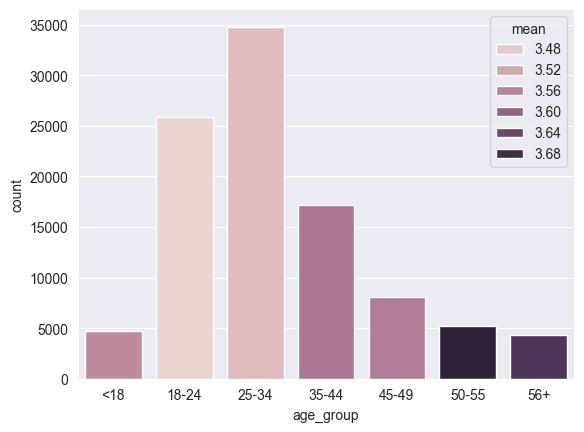

In [198]:
bins = [0, 18, 25, 35, 45, 50, 56, 100]
labels = ["<18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"]

user_ratings["age_group"] = pd.cut(user_ratings["age"], bins=bins, labels=labels)

ratings_stats_per_age_group = (
    user_ratings.groupby("age_group", as_index=False, observed=False)["rating"]
    .agg(count="count", mean="mean")
)

sns.barplot(data=ratings_stats_per_age_group, x="age_group", y="count", hue="mean")


So what we can observe from the graph above is that the group with the highest number of ratings is that of people 25 - 34, and the group of people with the highest mean rating is people at ages 50-55. The difference in the mean rating is not all that dramatic though ( to me !!). Also, the age group that has the 2nd highest number of rate counts has surprisingly the lowest overall mean rating ( ages 18 - 24).

Now let's observe a bar diagram for the rating mean and average per gender. We are not really expecting any dramatic changes here.

<Axes: xlabel='gender', ylabel='count'>

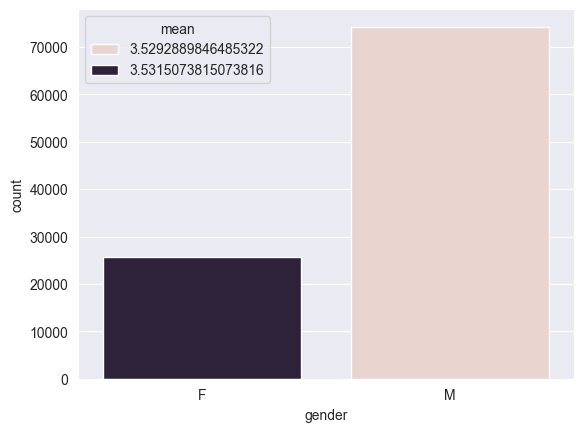

In [199]:
sns.barplot(ratings_stats_per_gender, x="gender", y="count", hue="mean")

And my prediction was wrong, even though the mean rating is about the same for both genders, we can clearly see that when it comes to the number of ratings, we have about a ration of 3 for men to women ratings.

Then, let's observe the bar diagram dor the ratings per occupation:

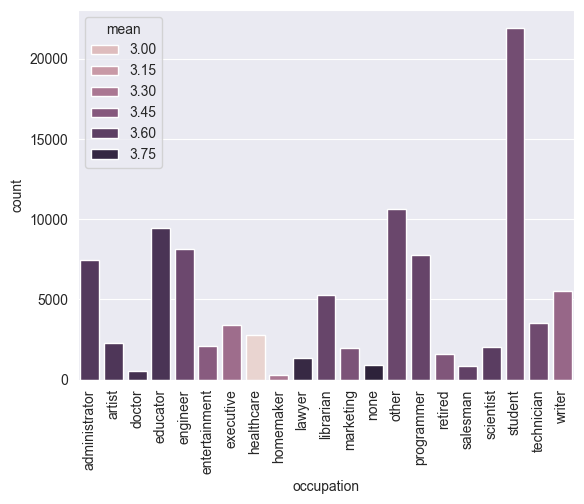

In [200]:
sns.barplot(ratings_stats_per_occupation, x="occupation", y="count", hue="mean")
plt.xticks(rotation=90);

Here, we can see that most of the ratings were overwhelming made by students. Another interesting fact we can observe here, is that in comparison to the previous plots, ratings by age and gender we can see that there is a way bigger disparity between the ratings. We can also observe that the lowest ratings were made by healthcare professionals.

And, the last one for the user - rating analysis will be an aggregated plot with the count and the mean of rating per gender and age:

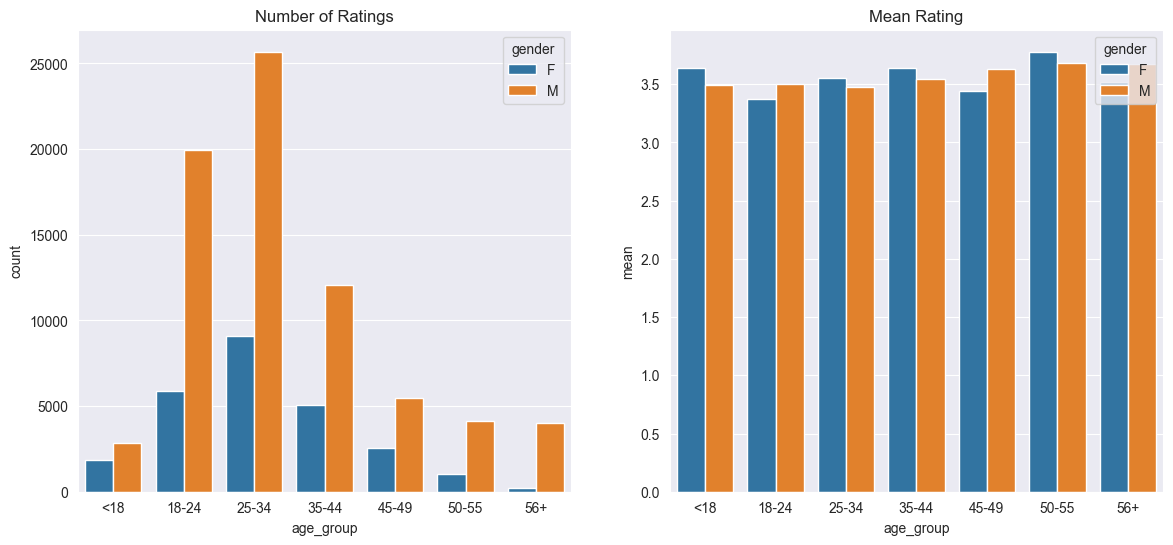

In [201]:
user_ratings["age_group"] = pd.cut(user_ratings["age"], bins=bins, labels=labels)

ratings_stats_per_age_group_and_gender = (
    user_ratings.groupby(["age_group", "gender"], as_index=False, observed=True)["rating"]
    .agg(count="count", mean="mean")
)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

sns.barplot(
    data=ratings_stats_per_age_group_and_gender,
    x="age_group", y="count", hue="gender", ax=axes[0]
)
axes[0].set_title("Number of Ratings")

sns.barplot(
    data=ratings_stats_per_age_group_and_gender,
    x="age_group", y="mean", hue="gender", ax=axes[1]
)
axes[1].set_title("Mean Rating")

plt.show()


We can see what we probably already expected, there is a huge difference in the count of ratings between male and female raters, with the largest difference being in the age groups that had overall the biggest count of rates. The mean ratings have a fluctuation in ratings, but overall I do not think there is a huge difference between them.

### Movie Ratings Data Visualisation

Now we will analyze the movies in relations to the data, we will strive to answer questions like which category has the best mean rating, which movie categories have the biggest rating counts. From the data available to us, for the movie - rating pairing I do not really want to analyze anything more than the correlation of the movie categories to the ratings.

Let's now analyze the count and mean rating per movie category.

In [202]:
genre_type = [ "unknown", 'action', 'adventure', 'animation','children\'s', 'comedy', 'crime', 'documentary', 'drama', 'fantasy','film-noir','horror', 'musical', 'mystery', 'romance', 'sci-fi','thriller','war', 'western']
genres_count = movies_ratings[genre_type].sum().reset_index()
genres_count.columns = ['genre', 'count']
print(genres_count)

          genre  count
0       unknown     10
1        action  25589
2     adventure  13753
3     animation   3605
4    children's   7182
5        comedy  29832
6         crime   8055
7   documentary    758
8         drama  39895
9       fantasy   1352
10    film-noir   1733
11       horror   5317
12      musical   4954
13      mystery   5245
14      romance  19461
15       sci-fi  12730
16     thriller  21872
17          war   9398
18      western   1854


So, now that we have creates an array with the category and then number of rated movies for each category we can create a bar graph to visualise the results.

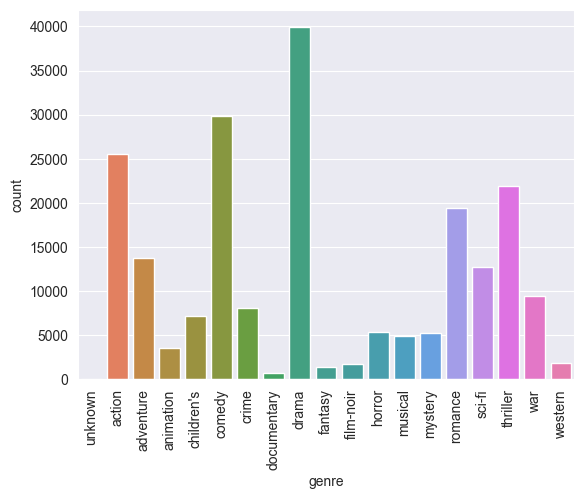

In [203]:
sns.barplot(genres_count, x="genre", y="count", hue="genre")
plt.xticks(rotation=90);

So here we can wee that the most popular categories in our data set are: drama, comedy, action, thriller and romance

Now we  should get the mean rating per movie category and visualize that as well.

In [204]:
genres_mean_rating = {
    genre: movies_ratings.loc[movies_ratings[genre] == 1, "rating"].mean()
    for genre in genre_type
}

genres_mean_rating = pd.DataFrame(list(genres_mean_rating.items()), columns=["genre", "mean_rating"])
print(genres_mean_rating.head())

        genre  mean_rating
0     unknown     3.200000
1      action     3.480245
2   adventure     3.503527
3   animation     3.576699
4  children's     3.353244


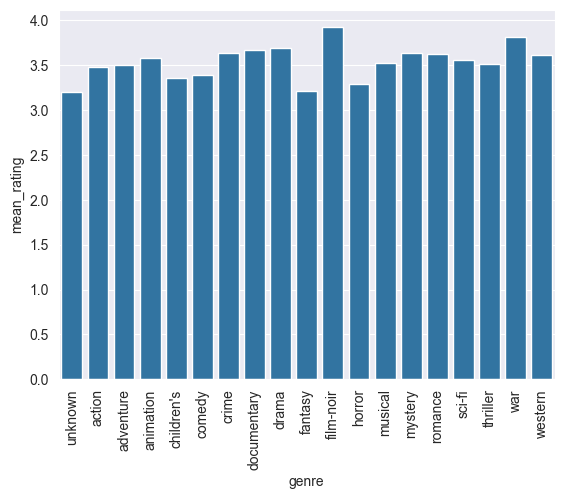

In [205]:
sns.barplot(genres_mean_rating, x="genre", y="mean_rating")
plt.xticks(rotation=90);

Here we can see that the average rating is not too different because of the category of the movie. When thinking about the mean rating as a standalone value in this dataset it is important to also remember the count of ratings, 1 movie with 1 5-star rating is not always better than a move with 500 reviews and a mean rating of 4. So these values alone do not indicate much. Observing the 2 bar plots though we can see that even though the film noir category has the highest mean rating compared to other film categories it also is one of the lowest rated movie categories.